# **Étude comparative entre la capitalisation et la répartition pour le système de retraite français (1985-2025)**

## **🔍 Objectif du projet**
Ce projet vise à comparer les performances d’un **système de retraite par capitalisation** avec le **système actuel par répartition** en France.  
L’objectif est de modéliser un **fonds souverain hypothétique**, où les cotisations des actifs seraient investies sur les marchés financiers, et d’analyser **les rendements et les pensions** qu’un tel système aurait pu fournir entre 1985 et 2025.

---

## **📈 Choix des indices**
### **Pourquoi comparer le CAC40 et le S&P500 ?**
Nous définissons **deux scénarios de référence** :
1. **Le CAC40 : un scénario conservateur**  
   - Il représente **l’économie française**, qui n’a pas bénéficié d’une capitalisation massive via des fonds de pension.
   - Si un **fonds souverain français** avait été instauré dès 1985, la capitalisation du CAC40 aurait logiquement été renforcée.

2. **Le S&P500 : un scénario optimiste**  
   - Il est **déjà massivement soutenu par des fonds de pension américains**.
   - Il permet **d’estimer ce que pourrait être un CAC40 dans un modèle capitalisé performant**.

💡 **Pourquoi cette comparaison ?**  
Cette approche permet d’avoir **une fourchette réaliste** entre un scénario prudent (**le CAC40**) et une projection optimiste (**le S&P500**), illustrant ce qu’un système capitalisé aurait pu générer en France.

---

### **🔗 Rôle des autres indices**
- **Le WGBI (World Government Bond Index)** est utilisé comme **référence obligataire** pour la partie obligations des portefeuilles.
- **Le FTSE100 (indice britannique)** est uniquement utilisé **pour le backfill des données manquantes** afin de garantir une série continue.

---

## **📊 Méthodologie**
### **1️⃣ Collecte et prétraitement des données**
- Récupération des historiques du **CAC40, S&P500 et WGBI**.
- **Reconstruction des données manquantes (backfill)** pour garantir une continuité temporelle.
- **Normalisation des indices** pour assurer une comparabilité sur une même échelle.

### **2️⃣ Simulation des allocations**
Nous modélisons **4 portefeuilles types**, répartis de la manière suivante :
- **50% actions / 50% obligations** (CAC40/WGBI et S&P500/WGBI).
- **75% actions / 25% obligations** (CAC40/WGBI et S&P500/WGBI).

📌 **Hypothèse clé** : Les cotisations mensuelles sont **progressivement investies** dans ces portefeuilles (**DCA – Dollar Cost Averaging**).

### **3️⃣ Calcul des rendements et pensions**
- **Estimation des rendements annualisés** des différentes allocations.
- **Détermination du taux de prélèvement optimal** pour garantir une pension stable sur **25 ans**, en cohérence avec l’espérance de vie moyenne des retraités.
- Ce taux permet de **maximiser les retraits** tout en assurant la viabilité du fonds.

### **4️⃣ Prise en compte de la solidarité**
- **Intégration des dispositifs de solidarité retraite** (ASPA, ASV) pour les bénéficiaires n’ayant pas cotisé pleinement.
- **Ajustement du modèle** pour inclure ces coûts dans l’estimation des pensions viables.

### **5️⃣ Analyse des résultats**
- **Comparaison des pensions obtenues** avec celles du système actuel.
- **Évaluation de l’impact des différentes allocations** et des rendements observés.
- **Visualisation des performances** du fonds de retraite hypothétique.

---


In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_ = pd.read_csv(r"C:\Users\Vincent\Code\Vincent-20-100\backtest_retraites\data\processed\Normalized_Index_For_Backtest.csv")
df_

,Date,CAC40,SNP500,WGBI
0,1985-01-01,1.000000,1.000000,1.000000
1,1985-02-01,1.717798,1.239637,1.023562
2,1985-03-01,1.633066,1.319085,0.983299
3,1985-04-01,1.748727,1.267616,1.001953
4,1985-05-01,1.836048,1.213139,1.025088
...,...,...,...,...
475,2024-08-01,210.608674,131.262195,5.563031
476,2024-09-01,214.853325,133.495162,5.609308
477,2024-10-01,214.930718,136.817643,5.553460
478,2024-11-01,207.689384,136.113466,5.728995


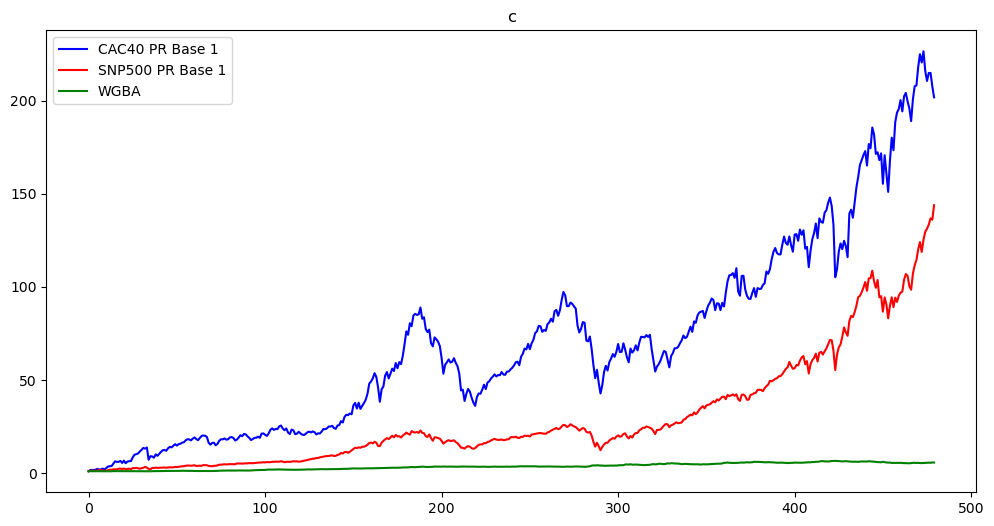

In [8]:
# Afichage du CAC 40 avec le backfill
plt.figure(figsize=(12,6))
plt.plot(df_.index, df_["CAC40"], label="CAC40 PR Base 1", color="blue")
plt.plot(df_.index, df_["SNP500"], label="SNP500 PR Base 1", color="red")
plt.plot(df_.index, df_["WGBI"], label="WGBA", color="green")
plt.legend()
plt.title("c")
plt.show()

In [18]:
# Calcul de la matrice de corrélation entre les données backfillées et les données originales
backfill_correlation_matrix = df_before_cac.drop(columns="WGBI").corr(method='pearson')

# Affichage de la matrice de corrélation
print("Matrice de corrélation du backfill:")
print(backfill_correlation_matrix)
print()

# Comparer la corrélation générale entre les colonnes
corr_all = df.corr()
print("Matrice de corrélation générale:")
print(correlation_matrix)

# Si les corrélations sont significativement plus faibles sur les données backfillées, cela peut indiquer une faible précision du backfill.


Matrice de corrélation du backfill:
              CAC40_Open  SP500_Open  FTSE100_Open
CAC40_Open      1.000000    0.980949      0.999838
SP500_Open      0.980949    1.000000      0.977294
FTSE100_Open    0.999838    0.977294      1.000000

Matrice de corrélation générale:
              CAC40_Open  SP500_Open  FTSE100_Open
CAC40_Open      1.000000    0.848502      0.905626
SP500_Open      0.848502    1.000000      0.805809
FTSE100_Open    0.905626    0.805809      1.000000


###**⚠️ Note sur la qualité du backfill**
Une corrélation plus forte que la moyenne entre les valeurs backfillées et les données réelles des marchés signifie que notre modèle de backfill est très calqué sur les tendances historiques, ce qui peut réduire la variabilité naturelle et donner une estimation trop optimiste. Cependant, dans notre cas d’usage, cette approximation est jugée suffisante car elle permet seulement de comparer un modèle de retraite par capitalisation avec le système actuel, et non pas de prédire avec précision des performances passées.

## **📌 Création du DataFrame des salaires et cotisations mensuels**

Pour simplifier l’analyse, nous avons choisi de récupérer les **salaires** et les **taux de cotisation** aux dates de **début (1985) et fin (2025)** à partir des données de l'**INSEE**.  
L’évolution des salaires a ensuite été **lissée annuellement** sur toute la période en appliquant un **taux d’augmentation constant**.


In [22]:
# Définir les salaires et les taux
salaire_1985 = 1156  # Salaire médian de 1985
salaire_2025 = 2735  # Salaire médian de 2025
taux_1985 = 15.0  # Taux de cotisation en 1985
taux_2025 = 24.0  # Taux de cotisation en 2025

# Calcul du taux d'augmentation annuel pour le salaire
start_year = df.index.year.min()  # Récupérer l'année de début depuis l'index de ton DataFrame
end_year = df.index.year.max()  # Récupérer l'année de fin depuis l'index de ton DataFrame

# Calcul du taux d'augmentation annuel du salaire
taux_augmentation_annuel_salaire = (salaire_2025 / salaire_1985) ** (1 / (end_year - start_year)) - 1

# Calcul du taux d'augmentation annuel du taux de cotisation
taux_augmentation_annuel_cotisation = (taux_2025 / taux_1985) ** (1 / (end_year - start_year)) - 1

# Création des dates pour chaque année dans la période
dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')

# Calcul du salaire mensuel pour chaque année
salaires = [salaire_1985 * (1 + taux_augmentation_annuel_salaire) ** (year - start_year) for year in range(start_year, end_year + 1)]

# Calcul du taux de cotisation pour chaque année
taux_cotisations = [taux_1985 * (1 + taux_augmentation_annuel_cotisation) ** (year - start_year) for year in range(start_year, end_year + 1)]

# Répéter les salaires et taux de cotisation pour chaque mois
salaire_mensuel = np.repeat(salaires, 12)
taux_cotisation_annuel = np.repeat(taux_cotisations, 12)

# Calcul des cotisations mensuelles
cotisations = salaire_mensuel * (taux_cotisation_annuel / 100)  # Conversion du taux de cotisation en pourcentage

# Création du DataFrame
salaire_df = pd.DataFrame({'Date': dates, 'salaire_mensuel': salaire_mensuel, 'taux_cotisation': taux_cotisation_annuel, 'cotisations': cotisations})

# Affichage des premières lignes pour vérification
print(salaire_df)

ValueError: All arrays must be of the same length

In [22]:
# Fusionner les données de salaire avec les indices boursiers sur la date
df_ = salaire_df.merge(df[["CAC40_Norm", "SP500_Norm", "WGBI_Norm"]], on='Date', how='left')
df_.set_index("Date", inplace=True)
# Vérification
print(df_.head())

            salaire_mensuel  taux_cotisation  cotisations  CAC40_Norm  \
Date                                                                    
1985-01-01           1156.0             15.0        173.4    1.000000   
1985-02-01           1156.0             15.0        173.4    1.040978   
1985-03-01           1156.0             15.0        173.4    1.026972   
1985-04-01           1156.0             15.0        173.4    1.041241   
1985-05-01           1156.0             15.0        173.4    1.053343   

            SP500_Norm  WGBI_Norm  
Date                               
1985-01-01    1.000000   1.000000  
1985-02-01    1.074342   1.023562  
1985-03-01    1.083612   0.983299  
1985-04-01    1.080502   1.001953  
1985-05-01    1.075538   1.025088  


## 📌 **Simulation de la capitalisation des cotisations en DCA**

L’objectif de cette section est de **modéliser ce qu’aurait pu générer un système de retraite par capitalisation**, en supposant que les **cotisations mensuelles** n’avaient pas été immédiatement redistribuées, mais investies sur les marchés financiers.

#### **Approche en DCA (Dollar Cost Averaging) 🏦**  
- Chaque mois, les **cotisations sont investies progressivement** dans un portefeuille financier au lieu d’être immédiatement reversées aux retraités.  

#### **Mécanisme d’accumulation 💰**  
- Chaque mois, la **valeur du capital** est mise à jour en appliquant la **performance des indices** correspondant à l’allocation choisie.  
- Les **cotisations suivantes** s’ajoutent au capital déjà constitué, créant un **effet de capitalisation** renforcé par les **intérêts composés**.

### **Pourquoi cette approche est clé ?**
Cette simulation représente **le cœur de l’étude**, car elle permet de **comparer directement** ce qu’un **système de capitalisation** aurait généré **face au modèle actuel par répartition**


In [25]:
# Initialisation des colonnes avec les cotisations du premier mois
df_["CAC40_50/50"] = df_["cotisations"]
df_["SNP500_50/50"] = df_["cotisations"]
df_["CAC40_75/25"] = df_["cotisations"]
df_["SNP500_75/25"] = df_["cotisations"]

# Boucle pour calculer la capitalisation cumulative avec pondération
for i in range(1, len(df_)):
    # Calcul de la variation entre le mois actuel et le mois précédent pour chaque indice
    variation_CAC40 = df_.loc[df_.index[i], "CAC40_Norm"] / df_.loc[df_.index[i - 1], "CAC40_Norm"]
    variation_WGBI = df_.loc[df_.index[i], "WGBI_Norm"] / df_.loc[df_.index[i - 1], "WGBI_Norm"]
    variation_SNP500 = df_.loc[df_.index[i], "SP500_Norm"] / df_.loc[df_.index[i - 1], "SP500_Norm"]

    # Allocation 50% CAC40 - 50% World Bonds
    df_.loc[df_.index[i], "CAC40_50/50"] = (
        df_.loc[df_.index[i - 1], "CAC40_50/50"] * ((0.5 * variation_CAC40) + (0.5 * variation_WGBI)) # Ajustement pondéré du portefeuille aux cours des indices
        + df_.loc[df_.index[i], "cotisations"]  # Ajout des cotisations mensuelles
    )

    # Allocation 50% S&P500 - 50% World Bonds
    df_.loc[df_.index[i], "SNP500_50/50"] = (
        df_.loc[df_.index[i - 1], "SNP500_50/50"] * ((0.5 * variation_SNP500) + (0.5 * variation_WGBI)) # Ajustement pondéré du portefeuille aux cours des indices
        + df_.loc[df_.index[i], "cotisations"]  # Ajout des cotisations mensuelles
    )

    # Allocation 75% CAC40 - 25% World Bonds
    df_.loc[df_.index[i], "CAC40_75/25"] = (
        df_.loc[df_.index[i - 1], "CAC40_75/25"] * ((0.75 * variation_CAC40) + (0.25 * variation_WGBI)) # Ajustement pondéré du portefeuille aux cours des indices
        + df_.loc[df_.index[i], "cotisations"]  # Ajout des cotisations mensuelles
    )

    # Allocation 75% S&P500 - 25% World Bonds
    df_.loc[df_.index[i], "SNP500_75/25"] = (
        df_.loc[df_.index[i - 1], "SNP500_75/25"] * ((0.75 * variation_SNP500) + (0.25 * variation_WGBI)) # Ajustement pondéré du portefeuille aux cours des indices
        + df_.loc[df_.index[i], "cotisations"]  # Ajout des cotisations mensuelles
    )

# Vérification
print(df_[["CAC40_50/50", "SNP500_50/50", "CAC40_75/25", "SNP500_75/25"]])


              CAC40_50/50   SNP500_50/50    CAC40_75/25   SNP500_75/25
Date                                                                  
1985-01-01     173.400000     173.400000     173.400000     173.400000
1985-02-01     352.395627     355.288323     353.150582     357.489626
1985-03-01     516.494067     523.233295     519.514186     529.687563
1985-04-01     698.381184     700.845417     700.791614     704.459497
1985-05-01     883.902439     880.726756     884.345593     879.498638
...                   ...            ...            ...            ...
2024-08-01  374231.051178  576302.178629  384613.245281  755652.499429
2024-09-01  380215.240208  583833.043930  391883.327240  766686.721167
2024-10-01  378841.091107  588530.224207  391351.267361  779119.263827
2024-11-01  379043.009731  596724.072737  385118.493774  782429.967468
2024-12-01  372806.734178  611829.627144  376606.687823  814220.526151

[480 rows x 4 columns]


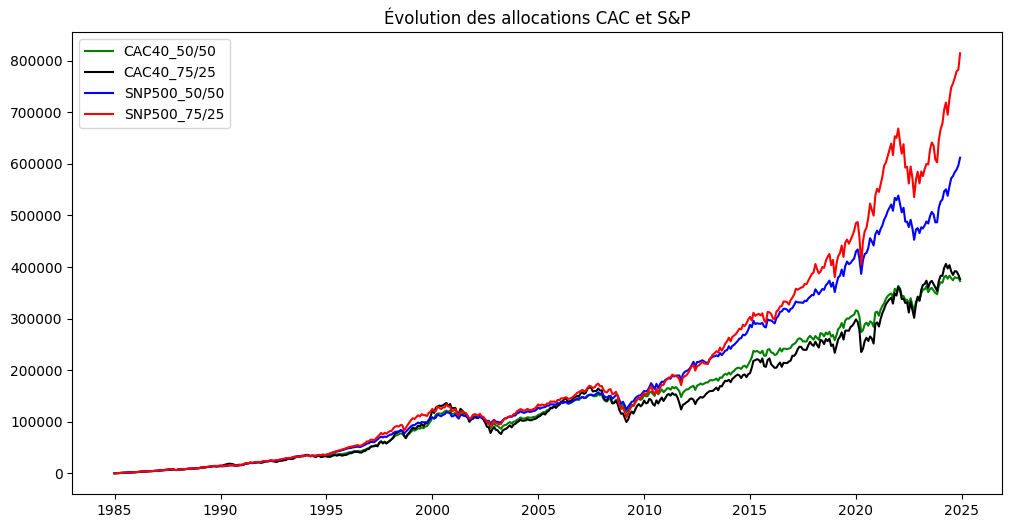

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df_.index, df_["CAC40_50/50"], label="CAC40_50/50", color="green")
plt.plot(df_.index, df_["CAC40_75/25"], label="CAC40_75/25", color="black")
plt.plot(df_.index, df_["SNP500_50/50"], label="SNP500_50/50", color="blue")
plt.plot(df_.index, df_["SNP500_75/25"], label="SNP500_75/25", color="red")

plt.legend()
plt.title("Évolution des allocations CAC et S&P")
plt.show()

In [29]:
# Récupérer la dernière valeur de chaque allocation
cac_50_50_final = df_["CAC40_50/50"].iloc[-1]
cac_75_25_final = df_["CAC40_75/25"].iloc[-1]
snp_50_50_final = df_["SNP500_50/50"].iloc[-1]
snp_75_25_final = df_["SNP500_75/25"].iloc[-1]

# Afficher les résultats
print(f"CAC40_50/50 final: {cac_50_50_final:.2f}")
print(f"CAC40_75/25 final: {cac_75_25_final:.2f}")
print(f"SNP500_50/50 final: {snp_50_50_final:.2f}")
print(f"SNP500_75/25 final: {snp_75_25_final:.2f}")

mean_50_50 = np.mean([cac_50_50_final, snp_50_50_final])
mean_75_75 = np.mean([cac_75_25_final, snp_75_25_final])
print(f"Mean_50/50 final: {mean_50_50:.2f}")
print(f"Mean_75/25 final: {mean_75_75:.2f}")

global_mean = np.mean([mean_50_50, mean_75_75])
print(f"Global mean final: {global_mean:.2f}")


CAC40_50/50 final: 372806.73
CAC40_75/25 final: 376606.69
SNP500_50/50 final: 611829.63
SNP500_75/25 final: 814220.53
Mean_50/50 final: 492318.18
Mean_75/25 final: 595413.61
Global mean final: 543865.89


In [ ]:
df_.to_csv("backtest_retraites_capitalisation.csv", index=True, encoding="utf-8")

## 📌 **Performance annualisée de nos portefeuilles**

Nous allons simplement calculé la performence de nos diférentes stratégies d'allocations sur la période de test.


In [30]:
# Nombre d'années
years = 40  # De 1985 à 2025

# Valeurs finales des indices normalisés
cac40_final = df_['CAC40_Norm'].iloc[-1]
snp500_final = df_['SP500_Norm'].iloc[-1]
WGBI_final = df_['WGBI_Norm'].iloc[-1]

# Calcul du rendement annuel pour chaque portefeuille
cac40_50_50_rdt = (((0.5 * cac40_final) + (0.5 * WGBI_final)) / 1) ** (1 / years) - 1
cac40_75_25_rdt = (((0.75 * cac40_final) + (0.25 * WGBI_final)) / 1) ** (1 / years) - 1
snp500_50_50_rdt = (((0.5 * snp500_final) + (0.5 * WGBI_final)) / 1) ** (1 / years) - 1
snp500_75_25_rdt = (((0.75 * snp500_final) + (0.25 * WGBI_final)) / 1) ** (1 / years) - 1

# Affichage des résultats
print(f"CAC40 50/50 annualisé : {cac40_50_50_rdt * 100:.4f}%")
print(f"CAC40 75/25 annualisé : {cac40_75_25_rdt * 100:.4f}%")
print(f"S&P500 50/50 annualisé : {snp500_50_50_rdt * 100:.4f}%")
print(f"S&P500 75/25 annualisé : {snp500_75_25_rdt * 100:.4f}%")


CAC40 50/50 annualisé : 4.9810%
CAC40 75/25 annualisé : 5.2147%
S&P500 50/50 annualisé : 7.8965%
S&P500 75/25 annualisé : 8.7370%


## 📌 **Calcul du taux de retrait maximum**

L’objectif est de **déterminer le pourcentage du capital initial** qu’un retraité pourrait **retirer chaque année**, tout en garantissant **un capital disponible sur 25 ans**, durée moyenne de la retraite en France.

🔹 Nous ne pousvons pas comparer une retraite par répartition avec un capital maintenue et le regle des 4% c'est pourquoi il faut trouver le "sweetspot" commele ferais un fond souverain qui n'a pas pour but d'accumuler le capital non reversé.
🔹 Ce taux permet de **maximiser la pension**, tout en assurant la **pérennité du capital** sur la durée prévue.  


In [31]:
withdrawal_years = 25

def safe_withdrawal_rate(annual_return, years):
    return annual_return / (1 - (1 + annual_return) ** -years)

cac40_50_50_swr = safe_withdrawal_rate(cac40_50_50_rdt, withdrawal_years)
cac40_75_25_swr = safe_withdrawal_rate(cac40_75_25_rdt, withdrawal_years)
snp500_50_50_swr = safe_withdrawal_rate(snp500_50_50_rdt, withdrawal_years)
snp500_75_25_swr = safe_withdrawal_rate(snp500_75_25_rdt, withdrawal_years)

print(f"CAC40 50/50 Safe withdrawal : {cac40_50_50_swr:.2%}")
print(f"CAC40 75/25 Safe withdrawal : {cac40_75_25_swr:.2%}")
print(f"S&P500 50/50 Safe withdrawal : {snp500_50_50_swr:.2%}")
print(f"S&P500 75/25 Safe withdrawal : {snp500_75_25_swr:.2%}")

# On sélectionne le pourcentage le plus prudent (le plus faible) et on l'arrondit à 7%
withdrawal_rate_selected = min(cac40_50_50_swr, cac40_75_25_swr, snp500_50_50_swr, snp500_75_25_swr)
print()
print(f"Taux de prélèvement sélectionné : {withdrawal_rate_selected:.2%}")


CAC40 50/50 Safe withdrawal : 7.08%
CAC40 75/25 Safe withdrawal : 7.25%
S&P500 50/50 Safe withdrawal : 9.29%
S&P500 75/25 Safe withdrawal : 9.96%

Taux de prélèvement sélectionné : 7.08%


## **📌 Explication du taux de prélèvement sélectionné**
Nous avons choisi d’appliquer un **taux de prélèvement annuel de 7%**, qui correspond au taux de retrait sécurisé de l’allocation ayant la performance la plus faible.  
Ce taux est **le plus prudent** parmi toutes les allocations testées, garantissant que le fonds reste viable sur **25 ans**, en cohérence avec l’espérance de vie moyenne des retraités.  

Cependant, pour **une analyse plus poussée**, nous avons également calculé des **taux optimaux pour chaque allocation**, qui permettent de maximiser les retraits sans risque d’épuisement prématuré du capital.  
Ainsi, **les allocations les plus performantes** (notamment celles exposées au S&P500) pourraient permettre un **taux de prélèvement plus élevé**, et donc des pensions encore plus importantes.


## **📌 Résultat de l'étude ! 🚀**

Nous arrivons enfin au **calcul clé de cette étude** : **combien un retraité français aurait-il pu percevoir** si ses cotisations avaient été capitalisées plutôt que redistribuées immédiatement ?  

L’objectif est de **comparer la pension issue d’un système par capitalisation** avec la **pension médiane actuelle**, en prenant comme référence un **travailleur au salaire médian** tout au long de sa carrière.

### 📊 **Référence du système actuel :**
D'après le **rapport annuel de la DREES(1)**, la pension moyenne brute de droit direct, y compris la majoration pour **trois enfants et plus**, s’élevait en **décembre 2022** à **1 626 € bruts mensuels** pour les nouveaux retraités résidant en France.

Nous allons maintenant voir comment se compare cette retraite avec notre **modèle par capitalisation** simulé entre **1985 et 2025** ! 🔥


In [41]:
# Montant de la pension retraite brute médiane en France en 2022 :
retraite_actuelle = 1626

# Calcul du montant des cotisations
cac_50_50_pension = cac_50_50_final * withdrawal_rate_selected / 12
cac_75_25_pension = cac_75_25_final * withdrawal_rate_selected / 12
snp_50_50_pension = snp_50_50_final * withdrawal_rate_selected / 12
snp_75_25_pension = snp_75_25_final * withdrawal_rate_selected / 12

print(f"Pension mensuelle médiane brut en France en 2O22 : ----------------- {int(retraite_actuelle)}€")
print(f"Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 50/50 : --- {int(cac_50_50_pension)}€")
print(f"Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 75/20 : --- {int(cac_75_25_pension)}€")
print(f"Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 50/50 : -- {int(snp_50_50_pension)}€")
print(f"Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 75/75 : -- {int(snp_75_25_pension)}€")

Pension mensuelle médiane brut en France en 2O22 : ----------------- 1626€
Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 50/50 : --- 2200€
Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 75/20 : --- 2222€
Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 50/50 : -- 3610€
Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 75/75 : -- 4805€


## **📌 Intégration des prestations de solidarité**

Ces estimations de pensions mensuelles **ne prennent pas en compte** les prestations de solidarité destinées aux personnes n'ayant pas cotisé pleinement, mais bénéficiant tout de même d'un **minimum retraite** via l'**ASPA** (Allocation de Solidarité aux Personnes Âgées) et l'**ASV** (Allocation Supplémentaire du Minimum Vieillesse).  
Afin d'intégrer ces montants dans mon analyse, je vais estimer leur impact de manière approximative, faute de données précises.

Il est important de noter que les chiffres de bénéficiaires disponibles concernent principalement les personnes ayant **cotisé partiellement** au cours de leur carrière. En prenant en compte ce constat, j'ai calculé le **coût approximatif de ces prestations** et, en le comparant aux bénéfices générés par la capitalisation dans mon modèle, il apparaît que le financement de ces dispositifs serait largement réalisable.  
De plus, une partie des bénéficiaires ayant cotisé partiellement aurait tout de même accumulé un capital, réduisant ainsi le besoin de financement public.

### **📊 Données disponibles :**  
- **Fin 2023** : Le nombre total de bénéficiaires du **minimum vieillesse** s'élevait à environ **801 000 personnes**, dont **594 000** percevaient l'**ASPA** et **117 000** l'**ASV**. ([Source](https://www.fsv.fr/solidarite/minimum-vieillesse))  
- **Fin 2022** : Le montant moyen perçu était de **495 € par mois pour l'ASPA** et **440 € par mois pour l'ASV**. ([Source](https://lemediasocial.fr))  
- **Fin 2022** : Le nombre total de **retraités** en France était d'environ **17 millions**. ([Source](https://www.hellowork.com))  
- **Fin 2023** : Le **régime général** versait une pension à près de **15,3 millions de retraités**, qu'il s'agisse de pensions directes ou de pensions de réversion. ([Source](https://www.statistiques-recherche.lassuranceretraite.fr/app/uploads/2024/08/1.1-La-population-des-retraites.pdf))  

### **📈 Extrapolation et hypothèses :**  
Faute de données plus précises, je vais extrapoler ces chiffres afin d'intégrer ces prestations dans mon modèle et d'évaluer leur impact sur la viabilité d'un **système de capitalisation intégrant une solidarité minimale**.


In [35]:
ASPA_2023 = 594_000*495*12
ASV_2023 = 117_000*440*12
solidaritée_2023_milliards = (ASPA_2023 + ASV_2023) / 1_000_000_000
print(f"Montant des solidaritées retraites en 2023 environ = {int(solidaritée_2023_milliards)} Milliards")

nbr_retraites_2022 = 17_000_000
capi_aproximative_milliards = nbr_retraites_2022 * retraite_actuelle / 1_000_000_000
print(f"Montant total versé aux retraites en 2023 environ = {int(capi_aproximative_milliards)} Milliards")

print()
capi_total_cac_50_50 = cac_50_50_final * nbr_retraites_2022
print(f"Capitalisation total du fond CAC 40 50/50 = {int(capi_total_cac_50_50 / 1_000_000_000)} Milliards")
print()
print(f"Montant de la solidaritée de 0.1% sur les montant capitalisés = {capi_total_cac_50_50 * 0.001 / 1_000_000_000} Milliards")

Montant des solidaritées retraites en 2023 environ = 4 Milliards
Montant total versé aux retraites en 2023 environ = 27 Milliards

Capitalisation total du fond CAC 40 50/50 = 6337 Milliards

Montant de la solidaritée de 0.1% sur les montant capitalisés = 6.337714481024993 Milliards


In [37]:
# Calcul du montant des cotisations
cac_50_50_solidaire = cac_50_50_pension - (cac_50_50_pension*0.001)
cac_75_25_solidaire = cac_75_25_pension - (cac_50_50_pension*0.001)
snp_50_50_solidaire = snp_50_50_pension - (cac_50_50_pension*0.001)
snp_75_25_solidaire = snp_75_25_pension - (cac_50_50_pension*0.001)

print("RESULTATS FINAUX avec prise en compte du minimum vieillesse :")
print(f"Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 50/50 (solidaritée déduite) : {int(cac_50_50_solidaire)}€")
print(f"Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 75/20 (solidaritée déduite) : {int(cac_75_25_solidaire)}€")
print(f"Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 50/50 (solidaritée déduite) : {int(snp_50_50_solidaire)}€")
print(f"Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 75/75 (solidaritée déduite) : {int(snp_75_25_solidaire)}€")

RESULTATS FINAUX avec prise en compte du minimum vieillesse :
Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 50/50 (solidaritée déduite) : 2197€
Pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 75/20 (solidaritée déduite) : 2220€
Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 50/50 (solidaritée déduite) : 3608€
Pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 75/75 (solidaritée déduite) : 4802€


In [ ]:
# Récupération des montants calculés
pensions = [retraite_actuelle, cac_50_50_solidaire, cac_75_25_solidaire, snp_50_50_solidaire, snp_75_25_solidaire]
allocations = ['Retraite actuelle', 'CAC40 50/50', 'CAC40 75/25', 'S&P500 50/50', 'S&P500 75/25']

# Création du graphique
plt.figure(figsize=(10,6))

# Appliquer une couleur plus harmonieuse avec un gradient de bleu
colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(allocations)))  # Crée un gradient de bleu

# Générer les barres
bars = plt.bar(allocations, pensions, color=colors)

# Ajouter les labels au-dessus des barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,  # Position du texte
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=12)  # Affichage du montant

# Ajouter la ligne de référence en pointillé rouge
plt.axhline(y=retraite_actuelle, color='red', linestyle='--', linewidth=2)

# Titre et labels
plt.title("Comparaison des pensions mensuelles selon les allocations")

plt.ylabel("Pension mensuelle (€)")
plt.tight_layout()

# Affichage du graphique
plt.show()


## **📌 Explication du taux de prélèvement sélectionné**
Nous avons choisi d’appliquer un **taux de prélèvement annuel de 7%**, qui correspond au taux de retrait sécurisé de l’allocation ayant la performance la plus faible.  
Ce taux est **le plus prudent** parmi toutes les allocations testées, garantissant que le fonds reste viable sur **25 ans**, en cohérence avec l’espérance de vie moyenne des retraités.  

Cependant, pour **une analyse plus poussée**, nous avons également calculé des **taux optimaux pour chaque allocation**, qui permettent de maximiser les retraits sans risque d’épuisement prématuré du capital.  
Ainsi, **les allocations les plus performantes** (notamment celles exposées au S&P500) pourraient permettre un **taux de prélèvement plus élevé**, et donc des pensions encore plus importantes.


In [38]:
# Calcul du montant des cotisations
cac_50_50_pension_opti = cac_50_50_final * cac40_50_50_swr / 12
cac_75_25_pension_opti = cac_75_25_final * cac40_75_25_swr / 12
snp_50_50_pension_opti = snp_50_50_final * snp500_50_50_swr / 12
snp_75_25_pension_opti = snp_75_25_final * snp500_75_25_swr / 12

print("RESULTATS optimisés :")
print(f"pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 75/20 optimisée : {int(cac_75_25_pension_opti)}€")
print(f"pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 50/50 optimisée : {int(snp_50_50_pension_opti)}€")
print(f"pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 75/75 optimisée : {int(snp_75_25_pension_opti)}€")

RESULTATS optimisés :
pension mensuelle pour l'allocation CAC 40 / Wordl Bonds 75/20 optimisée : 2274€
pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 50/50 optimisée : 4734€
pension mensuelle pour l'allocation S&P 500 / Wordl Bonds 75/75 optimisée : 6761€


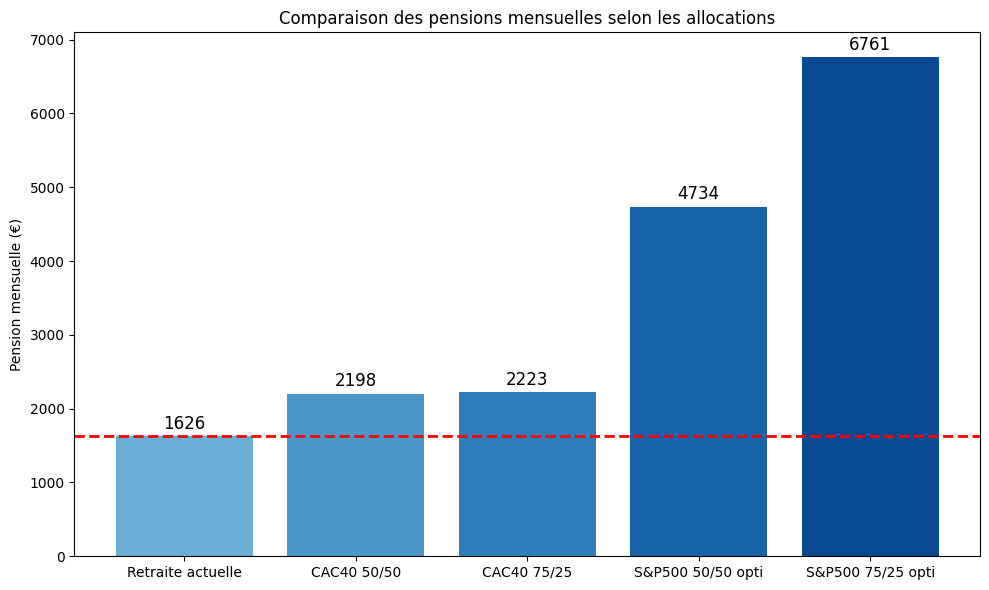

In [39]:
# Récupération des montants calculés
pensions = [retraite_actuelle, cac_50_50_solidaire, cac_75_25_pension, snp_50_50_pension_opti, snp_75_25_pension_opti]
allocations = ['Retraite actuelle', 'CAC40 50/50', 'CAC40 75/25', 'S&P500 50/50 opti', 'S&P500 75/25 opti']

# Création du graphique
plt.figure(figsize=(10,6))

# Appliquer une couleur plus harmonieuse avec un gradient de bleu
colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(allocations)))  # Crée un gradient de bleu

# Générer les barres
bars = plt.bar(allocations, pensions, color=colors)

# Ajouter les labels au-dessus des barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,  # Position du texte
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=12)  # Affichage du montant

# Ajouter la ligne de référence en pointillé rouge
plt.axhline(y=retraite_actuelle, color='red', linestyle='--', linewidth=2)

# Titre et labels
plt.title("Comparaison des pensions mensuelles selon les allocations")

plt.ylabel("Pension mensuelle (€)")
plt.tight_layout()

# Affichage du graphique
plt.show()


In [40]:
# Calcul des multiples
multiple_cac_50_50 = cac_50_50_pension / retraite_actuelle
multiple_cac_75_25 = cac_75_25_pension / retraite_actuelle
multiple_snp_50_50 = snp_50_50_pension / retraite_actuelle
multiple_snp_50_50_opti = snp_50_50_pension_opti / retraite_actuelle
multiple_snp_75_25 = snp_75_25_pension / retraite_actuelle
multiple_snp_75_25_opti = snp_75_25_pension_opti / retraite_actuelle

# Affichage des résultats
print(f"Multiple CAC40 50/50 : --------- x{multiple_cac_50_50:.2f}")
print(f"Multiple CAC40 75/25 : --------- x{multiple_cac_75_25:.2f}")
print(f"Multiple S&P500 50/50 : -------- x{multiple_snp_50_50:.2f}")
print(f"Multiple S&P500 50/50 optimisé : x{multiple_snp_50_50_opti:.2f}")
print(f"Multiple S&P500 75/25 : -------- x{multiple_snp_75_25:.2f}")
print(f"Multiple S&P500 75/25 optimisé : x{multiple_snp_75_25_opti:.2f}")

Multiple CAC40 50/50 : --------- x1.35
Multiple CAC40 75/25 : --------- x1.37
Multiple S&P500 50/50 : -------- x2.22
Multiple S&P500 50/50 optimisé : x2.91
Multiple S&P500 75/25 : -------- x2.96
Multiple S&P500 75/25 optimisé : x4.16


## **📌 Présentation des résultats**
Les résultats montrent que **toutes les allocations capitalisées surpassent largement le niveau des pensions actuelles**.  
Cette étude démontre qu’un **système de capitalisation bien structuré** aurait pu offrir des retraites **nettement supérieures** à celles du système actuel par répartition.

📌 **Observations clés** :\
✔️ **Le CAC40 seul offre déjà de meilleures pensions que le système actuel**, même sans effet de capitalisation massive.  
✔️ **Les allocations exposées au S&P500 produisent des pensions jusqu’à 4,16 fois plus élevées**, confirmant l’intérêt d’un modèle de capitalisation performant.  
✔️ **Même en intégrant un mécanisme de solidarité**, le système reste plus soutenable qu’une répartition classique.

💡 **Ces résultats permettent d’ouvrir la discussion sur une réforme possible du financement des retraites en France.**

## **🔮 Perspectives et pistes d’amélioration 🚀**

Bien que cette étude fournisse une estimation solide des performances potentielles d’un système par capitalisation, plusieurs axes d’amélioration pourraient affiner les résultats et les rendre encore plus représentatifs.

### 📌 **1. Amélioration du modèle de backfill**
Actuellement, le **backfill des données manquantes** repose sur une **régression linéaire simpliste** basée sur seulement **deux indices de référence**. Plusieurs pistes pourraient améliorer cette approche :
- **Intégrer d’autres indices** (MSCI World, Euro Stoxx 50…) pour enrichir la modélisation.
- **Utiliser un modèle plus avancé** de prévision de séries temporelles (ARIMA, LSTM, Prophet…) pour mieux estimer les valeurs manquantes.

### 📌 **2. Affiner la représentation des obligations**
L’indice obligataire utilisé (**WGBI**) est un **choix par défaut** en l’absence d’une meilleure alternative, mais il ne reflète pas nécessairement **ce qu’aurait été l’allocation d’un fonds souverain français**. Un axe d’amélioration serait donc :
- **Identifier un indice plus représentatif**, potentiellement basé sur une allocation d'obligations françaises ou européennes.

### 📌 **3. Récupérer les données réelles des salaires médians**
Plutôt que d’utiliser un **lissage approximatif** des salaires médians entre 1985 et 2025, **obtenir les valeurs réelles année par année** permettrait :
- **D'améliorer la précision** de la capitalisation des cotisations.
- **D’affiner la comparaison avec le système actuel**, qui repose sur les salaires effectifs.

### 📌 **4. Calculer la retraite exacte de notre profil type**
Actuellement, la **retraite médiane** est utilisée comme référence, mais un **travailleur au salaire médian toute sa carrière** n’aura pas nécessairement **la pension médiane actuelle**.  
Un **modèle plus précis** pourrait :
- **Simuler le calcul exact de la retraite** pour un individu avec une trajectoire salariale médiane.
- **Comparer directement** ce qu'il aurait perçu dans un système par répartition vs un système par capitalisation.

### 📌 **5. Étudier plusieurs profils de carrière et de salaires**
L’analyse actuelle repose sur **un seul profil type**, celui d’un individu ayant **le salaire médian toute sa vie**. Pour élargir l’étude et mieux capturer la diversité des situations, nous pourrions :
- **Créer plusieurs profils de référence :**
  - **Un travailleur au SMIC** 📉, pour évaluer l'impact sur les pensions les plus faibles.
  - **Un profil "haut revenu"** 📈, représentant un cadre ou ingénieur dans le dernier quartile de la distribution salariale.
  
- **Pourquoi cette approche ?**
  - **Comparer l’impact de la capitalisation sur différentes catégories socio-professionnelles.**
  - **Vérifier si les écarts de pensions sont plus ou moins amplifiés** entre les profils en capitalisation vs en répartition.
  - **Mieux estimer la soutenabilité du système**, notamment sur sa capacité à financer des prestations minimales.


💡 **Ces améliorations permettraient d'affiner encore davantage l’analyse et de renforcer la robustesse des conclusions obtenues.** 🔥


###*Vincent Lamy*
*Le 20 Mars 2025*